In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pdb

# Add the root directory of this repository
sys.path.append('../..')

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr')

from utils import gen_covariance, gen_beta2, gen_data, get_cov_list
from utils import selection_accuracy
from sklearn.linear_model import LassoLars, lasso_path, LinearRegression

from pyuoi.linear_model import UoI_Lasso

In [5]:
from postprocess import postprocess_dir
from postprocess_utils import *

In [6]:
# Postprocess awkward arrays

In [7]:
ss_test = postprocess_dir('../../../data/ss_test', exp_type='UoILasso', awkward=True)

75
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
(1050, 23)


In [8]:
ss_test2 = postprocess_dir('../../../data/ss_test2', exp_type='UoIMCP', awkward=True)

0
(0, 0)


In [ ]:
# Do the usual - iterate over sparsity, calculate the average covariances, and then 
# plot the average (over reps) maximum attained selection accuracy as a function of the stability selection
# parameter

In [9]:
sparsity = np.unique(ss_test['sparsity'].values)
stability_selection = np.unique(ss_test['stability_selection'].values)

In [6]:
# Maximum acheived stability_selection parameters for this set of shiteheads

In [10]:
n_features = ss_test.iloc[0]['n_features']

In [11]:
dummy = apply_df_filters(ss_test, sparsity = 0.1, stability_selection = 1.)

In [12]:
dummy.shape

(15, 23)

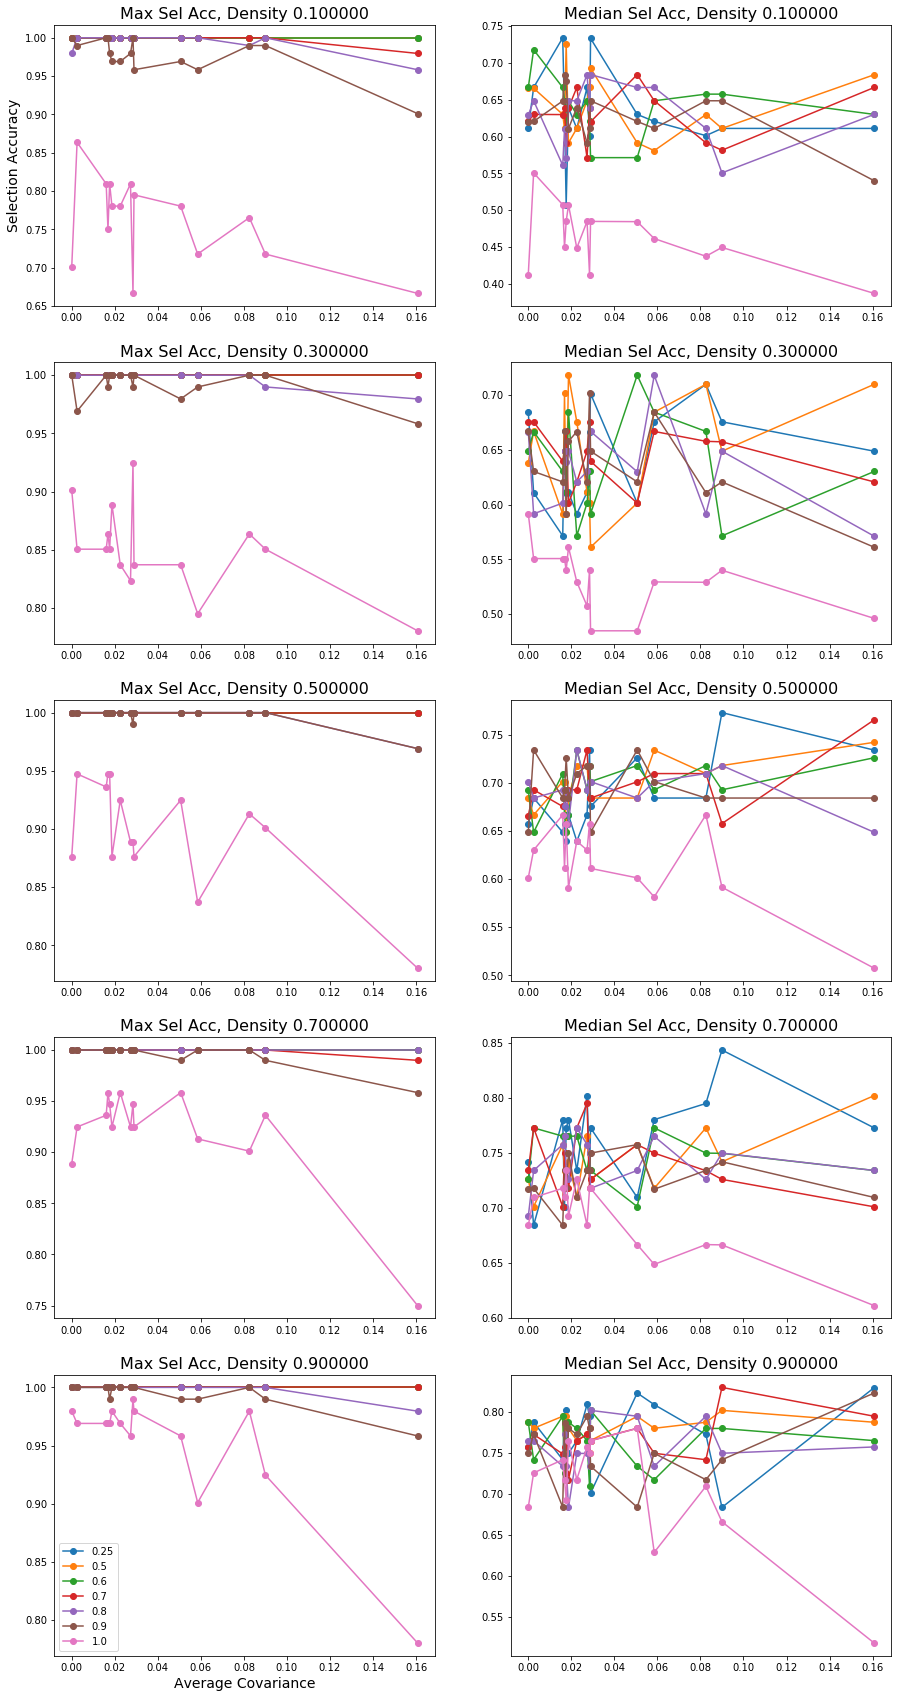

In [17]:
fig, ax = plt.subplots(5, 2, figsize = (15, 30))

for i, s in enumerate(sparsity):

    if i % 2:
        continue

    avg_cov = np.zeros((stability_selection.size, 15))
    sa_medians = np.zeros((stability_selection.size, 15))
    sa_uq = np.zeros((stability_selection.size, 15))
    sa_lq = np.zeros((stability_selection.size, 15))    

    for j, ss in enumerate(stability_selection):
        d = apply_df_filters(ss_test, sparsity=s, stability_selection=ss)
        for k in range(d.shape[0]):
            avg_cov[j, k] = calc_avg_cov(n_features, **d.iloc[k]['cov_params'])
            beta = d.iloc[k]['betadict']['beta'].ravel()
            selaccs = selection_accuracy(beta, 1 * np.array(d.iloc[k]['coefs']))
            sa_medians[j, k] = np.median(selaccs)
            lq, uq = np.quantile(selaccs, [0.25, 1])            

            sa_uq[j, k] = uq
            sa_lq[j, k] = lq
            
        # Sort appropriately
        cov_order = np.argsort(avg_cov[j, :])
        # Separately plot the max and median selection accuracies
        ax[int(i/2), 0].plot(avg_cov[j, cov_order], sa_uq[j, cov_order], '-o')
        ax[int(i/2), 1].plot(avg_cov[j, cov_order], sa_medians[j, cov_order], '-o')
        ax[int(i/2), 0].set_title('Max Sel Acc, Density %f' % s, fontsize = 16)
        ax[int(i/2), 1].set_title('Median Sel Acc, Density %f' % s, fontsize = 16)
        
ax[0, 0].set_ylabel('Selection Accuracy', fontsize=14)
ax[4, 0].set_xlabel('Average Covariance', fontsize=14)
ax[-1, 0].legend(stability_selection)

plt.savefig('stability_selection_sa.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
# Unsurprising here, need to re-run with UoI MCP as a comparison, and then also track the FNR, FPR, selection
# accuracy

In [2]:
fig, ax = plt.subplots(5, 2, figsize = (15, 30))

for i, s in enumerate(sparsity):

    if i % 2:
        continue
    avg_cov = np.zeros((stability_selection.size, 15))
    sa_medians = np.zeros((stability_selection.size, 15))
    sa_uq = np.zeros((stability_selection.size, 15))
    sa_lq = np.zeros((stability_selection.size, 15))    

    for j, ss in enumerate(stability_selection):
        d = apply_df_filters(ss_test2, sparsity=s, stability_selection=ss)
        for k in range(d.shape[0]):
            avg_cov[j, k] = calc_avg_cov(n_features, **d.iloc[k]['cov_params'])
            beta = d.iloc[k]['betadict']['beta'].ravel()
            selaccs = selection_accuracy(beta, 1 * np.array(d.iloc[k]['coefs']))
            sa_medians[j, k] = np.median(selaccs)
            lq, uq = np.quantile(selaccs, [0.25, 1])            

            sa_uq[j, k] = uq
            sa_lq[j, k] = lq
            
        # Sort appropriately
        cov_order = np.argsort(avg_cov[j, :])
        # Separately plot the max and median selection accuracies
        ax[int(i/2), 0].plot(avg_cov[j, cov_order], sa_uq[j, cov_order], '-o')
        ax[int(i/2), 1].plot(avg_cov[j, cov_order], sa_medians[j, cov_order], '-o')
                
ax[-1, 0].legend(stability_selection)

NameError: name 'plt' is not defined

In [ ]:
# No discernible advantage 

In [ ]:
# Apply various selectors to the stability selection

In [18]:
uoi_sel = postprocess_dir('../../../data/woes/stability_selection', exp_type='UoILasso')

75
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
(5250, 40)


In [19]:
stability_selection

array([0.25, 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.  ])

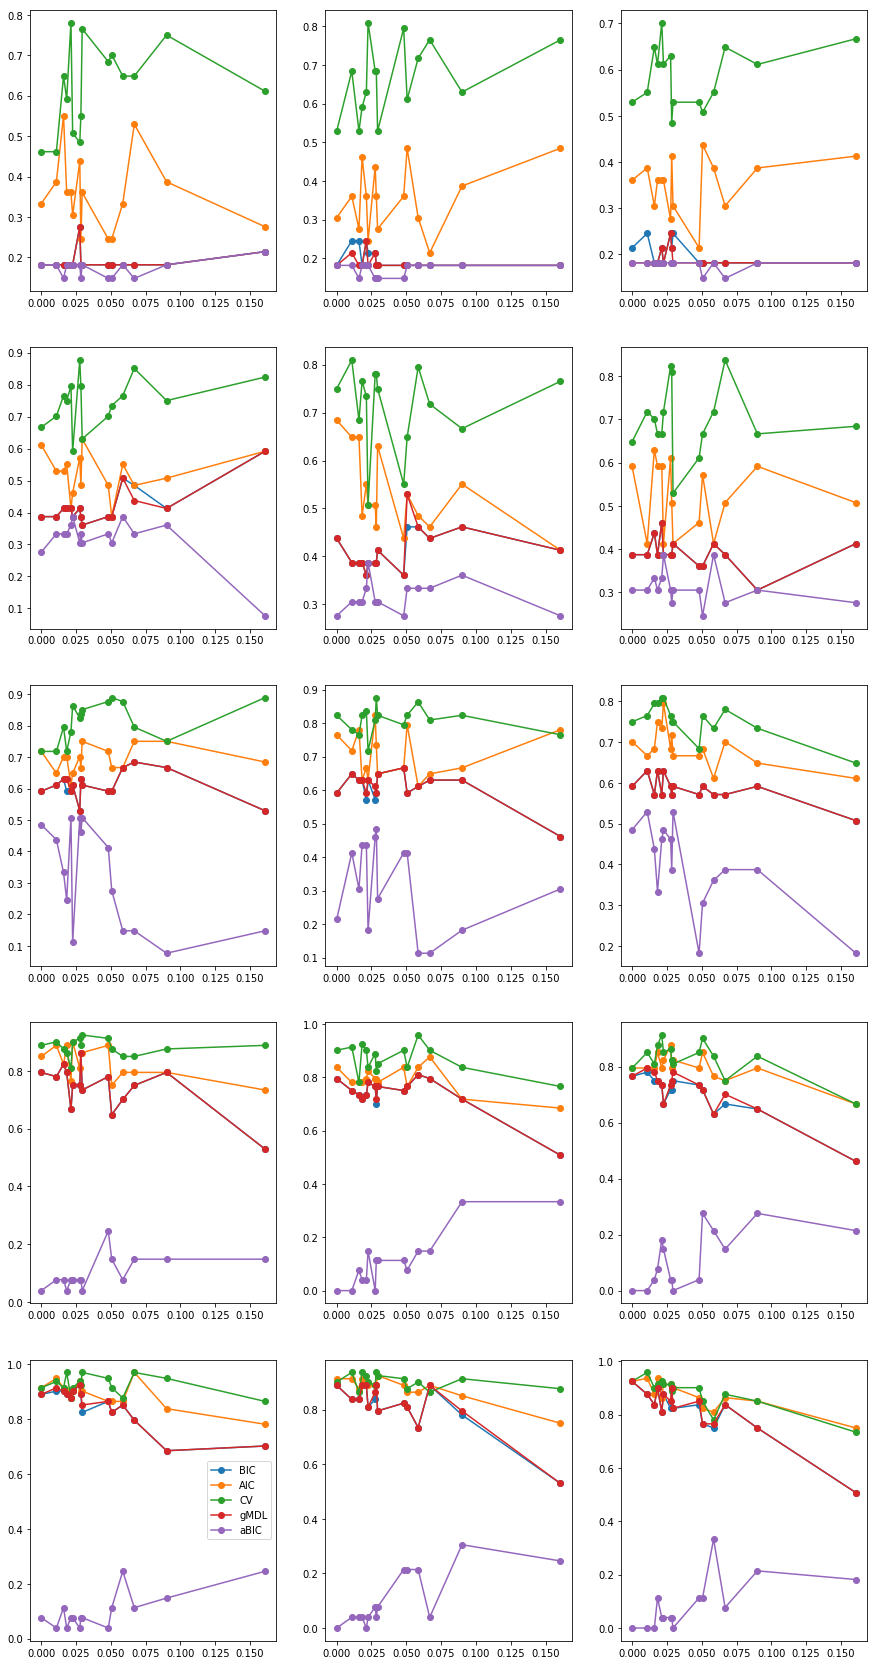

In [26]:
# Make the same plot as before for a few stability selection parameters. --> Create a 5x3 grid of plots where

fig, ax = plt.subplots(5, 3, figsize = (15, 30))

sparsity_ = np.array([sparsity[0], sparsity[2], sparsity[4], sparsity[6], sparsity[8]])
stab_sel = np.array([0.25, 0.7, 1])
selection_methods = ['BIC', 'AIC', 'CV', 'gMDL', 'aBIC']
for i, s in enumerate(sparsity_):

    for j, ss in enumerate(stab_sel): 
    
        for sel_method in selection_methods:
            d = apply_df_filters(uoi_sel, sparsity=s, stability_selection=ss, selection_method=sel_method)
            selaccs = np.zeros(15)
            avg_cov = np.zeros(15)
            for k in range(d.shape[0]):
                avg_cov[k] = calc_avg_cov(n_features, **d.iloc[k]['cov_params'])
                beta = d.iloc[k]['betadict']['beta'].ravel()
                selaccs[k] = selection_accuracy(beta, 1 * np.array(d.iloc[k]['beta_hats']))

            # Sort appropriately
            cov_order = np.argsort(avg_cov)
            ax[i, j].plot(avg_cov[cov_order], selaccs[cov_order], '-o')
ax[-1, 0].legend(selection_methods)

In [27]:
# Uhhh.....